<a href="https://colab.research.google.com/github/nicas83/ispr22/blob/main/GNicassio_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gaetano Nicassio - Assignment 3

**Assignment 3**

The musical pitch of a note is determined by its fundamental frequency. The pitch played by different instruments sounds different due to harmonics, i.e. other frequencies that are superimposed and determine the timbre of the instrument. This dataset contains samples from several instruments playing different notes. Plot the spectrogram for some of them (4 instruments are sufficient) and check if it is possible to recognize the different instruments by only looking at the spectrogram. In your presentation, discuss which samples you chose to compare, how you computed the spectrogram and whether the resulting features are sufficient to recognize the instrument.






In [ ]:
import librosa
import numpy
import matplotlib.pyplot as plot
# from google.colab import drive

# drive.mount('/content/gdrive')

Mounted at /content/gdrive


The first snippet of code, upload the signals. I chose 4 different signals and in particular: clarinet, saxophone, oboe and violin all with a "fortissimo" sound intensity. The signals (sounds) of the experiment were chosen according to a criterion of belonging to the same family, as in the case of clarinet and oboe (family of woodwinds) or for interchangeability in some musical contexts (think of the use of clarinets instead of violins in wind orchestras)

Using the **librosa** library I imported the signals and extracted them as floating point time series with the original sample rate using the *librosa.core.load* function (if not specified, the sampling rate will be at *22 KHz*).

In [ ]:
def import_sounds(intensity):
    if intensity == 'fortissimo':
        clarinet_wave_form, clarinet_sampling_rate = librosa.core.load("/content/sample_data/sounds/clarinet_A3_1_fortissimo_normal.mp3", sr=None)
        sax_wave_form, sax_sampling_rate = librosa.core.load("/content/sample_data/sounds/saxophone_A3_1_fortissimo_normal.mp3", sr=None)
        violin_wave_form, violin_sampling_rate = librosa.core.load("/content/sample_data/sounds/violin_A3_1_fortissimo_arco-normal.mp3", sr=None)
        oboe_wave_form, oboe_sampling_rate = librosa.core.load("/content/sample_data/sounds/oboe_A4_1_fortissimo_normal.mp3", sr=None)
    else:
        clarinet_wave_form, clarinet_sampling_rate = librosa.core.load("/content/sample_data/sounds/clarinet_A3_15_piano_normal.mp3", sr=None)
        sax_wave_form, sax_sampling_rate = librosa.core.load("/content/sample_data/sounds/saxophone_A3_025_mezzo-piano_normal.mp3", sr=None)
        violin_wave_form, violin_sampling_rate = librosa.core.load("/content/sample_data/sounds/violin_A3_1_piano_arco-normal.mp3", sr=None)
        oboe_wave_form, oboe_sampling_rate = librosa.core.load("/content/sample_data/sounds/oboe_A4_05_piano_normal.mp3", sr=None)

    waves_extraction = [[clarinet_wave_form, clarinet_sampling_rate, 'Clarinet'],
                        [sax_wave_form, sax_sampling_rate, 'Saxophone'],
                        [oboe_wave_form, oboe_sampling_rate, 'Oboe'],
                        [violin_wave_form, violin_sampling_rate, 'Violin']]

    return waves_extraction

After the extraction of the wave form and the sampling rate, I've computed the Short Time Fourier Transformation, to transform the original signal into spectral domain.
The STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows. The resulting spectrum is plotted as a function of time, with the frequency content represented by color or intensity.
Then I use the output from STFT to convert the resulting amplitude in a dB scaled spectrogram.

In [ ]:
def extract_feature(soundwave: list, col: int, row: int):
    features = [[i for i in range(col)] for j in range(row)]
    index = 0
    for wave in soundwave:
        # Short Time Fourier Transformation
        samples = librosa.stft(wave[0])
        # Amplitude to Decibel of the signal
        features[index][0] = librosa.amplitude_to_db(numpy.abs(samples), ref=numpy.max)
        # Spectral Centroid of the signal
        features[index][1] = librosa.feature.spectral_centroid(y=wave[0], sr=wave[1])
        # Instrument
        features[index][2] = wave[2]
        index += 1

    return features

I've plotted the spectogram of each signal adding the Spectral Centoid descriptor that is a weighted average frequency to understand if a specific descriptor can help to distinguish all the signals faster.

In [ ]:
def plot_result(signal_features, intensity):
    # Plot result
    figure, ax = plot.subplots(nrows=4)
    figure.set_figwidth(10)
    figure.set_figheight(10)
    for i in range(len(signal_features)):
        # get spectral centroid
        spectral_centroid = librosa.times_like(signal_features[i][1])
        # print spectrogram of the signal
        img = librosa.display.specshow(signal_features[i][0], y_axis='log', x_axis='time', ax=ax[i])
        plot_title = signal_features[i][2]
        figure.colorbar(img, ax=ax[i], format="%+2.f dB", label=plot_title)
        ax[i].plot(spectral_centroid, signal_features[i][1].T, color='w')

    figure.suptitle('Spectrogram ' + intensity, fontsize='xx-large')
    figure.savefig('/content/sample_data/output/spectrogram_' + intensity +'.png')
    plot.show()

To see the final output execute the following code: 

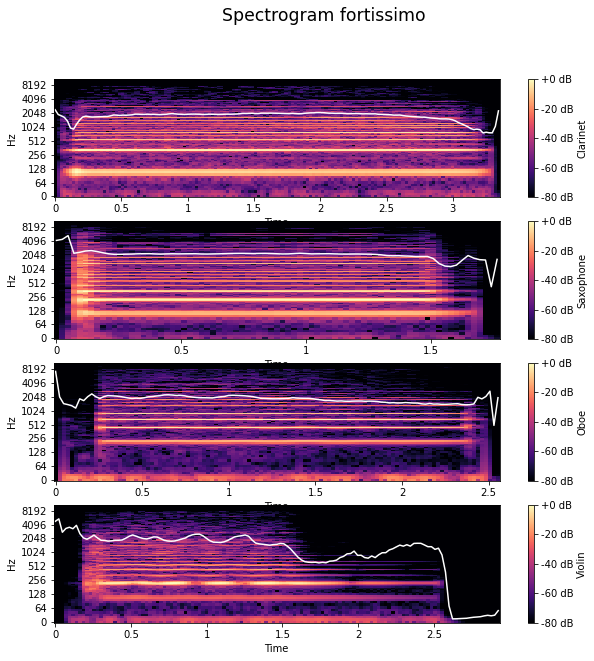

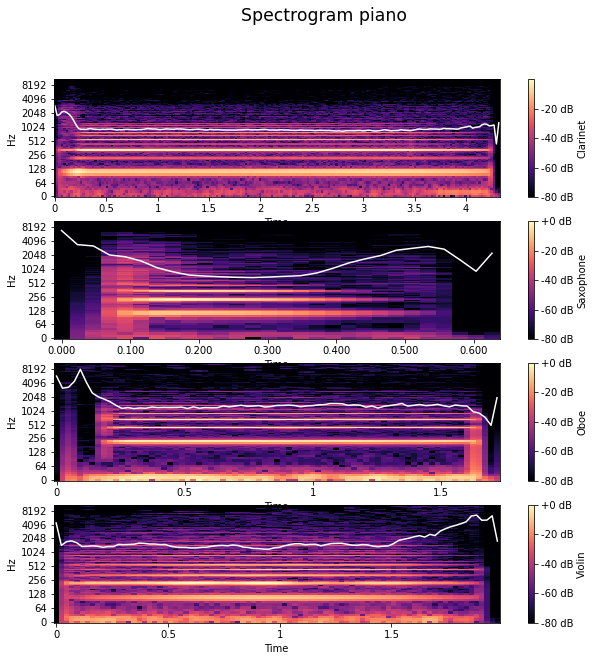

In [ ]:
# choose fortissimo or piano as intensity
sounds = import_sounds('fortissimo')
# extract spectrogram and spectral centroid from each signal
features = extract_feature(sounds, 3, 4)
plot_result(features, 'fortissimo')

sounds = import_sounds('piano')
# extract spectrogram and spectral centroid from each signal
features = extract_feature(sounds, 3, 4)
plot_result(features, 'piano')

#Output

The code above output the following plots, with a clear difference between the four sounds.

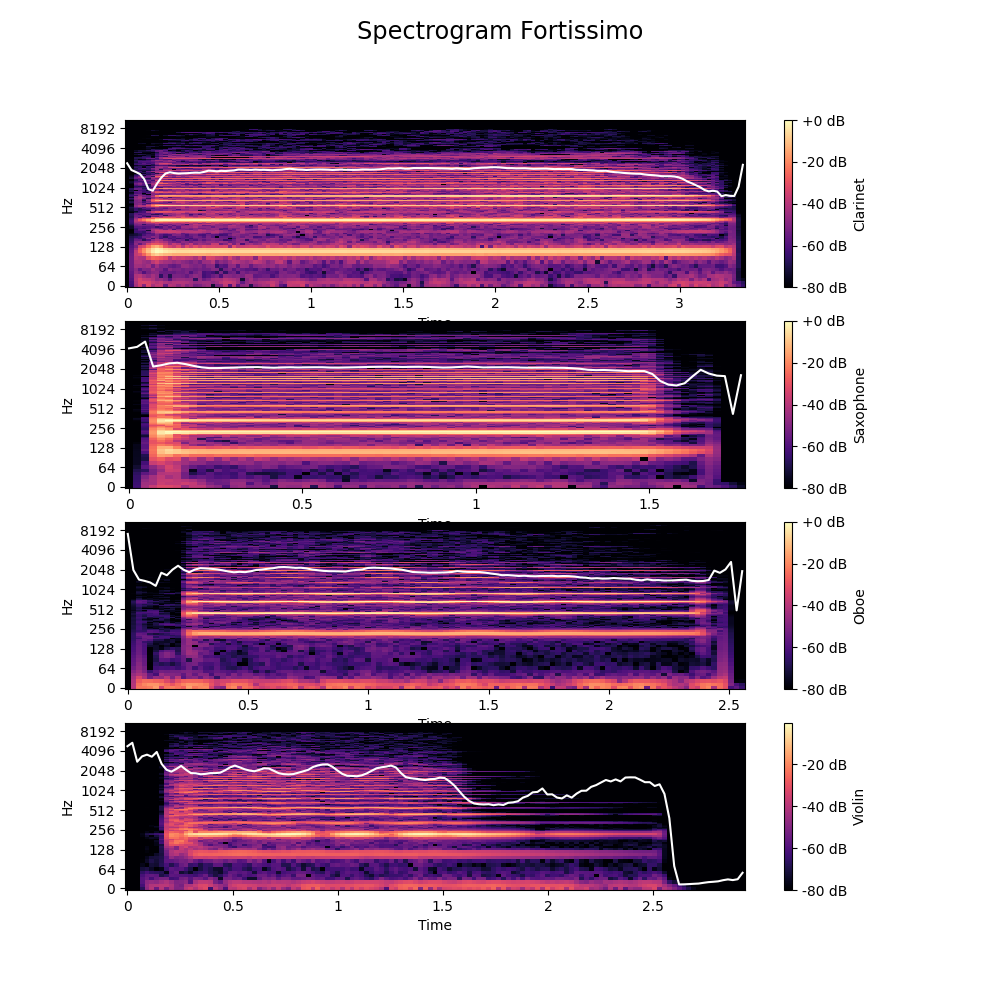

In order to verify if the difference of harmonics depends on the intensity of the sound, I've execute the experiment with the same instrument but at *piano* intensity. Also in this case the different ones are clearly distinguishable


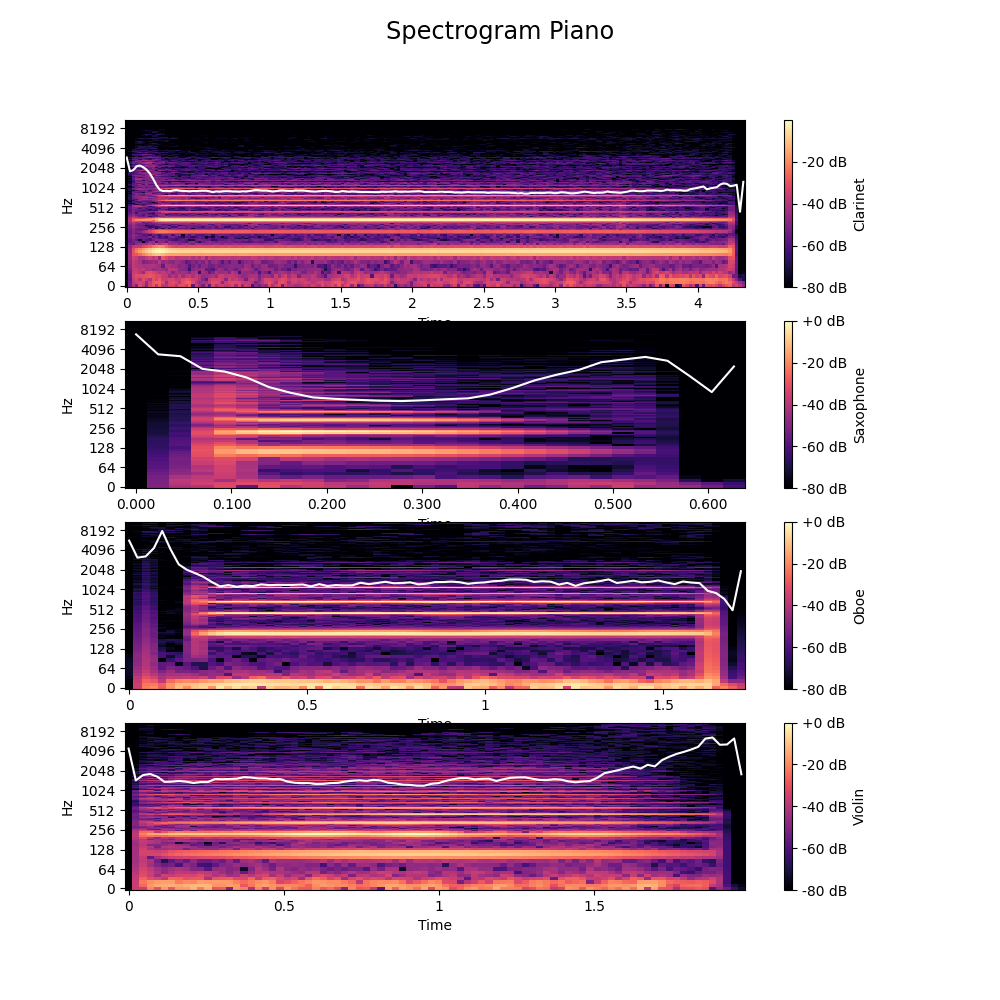

# Final Consideration

The experiment shows that it is possible to identify different instruments from their spectrograms (the signals used was very simple and clear from noise, so this helps in recognition).

Each instrument has a unique timbre, which is a result of the combination of harmonic frequencies and overtones produced by the instrument. By analyzing the spectrogram, it is possible to identify these unique harmonic frequencies, which can then be used to identify the instrument that produced the sound. For example Clarinet has a high brigth line in the range of *128Hz*. Saxophone looks  similar, but the brightness at *128Hz* is lower than the Clarinet and the set of frequencies between *256Hz* and *512Hz* is more present with respect to the Clarinet. 

Also the spectral centroid helps to identify the different signals, in this case better then the spectrogram. In the previous example between Clarinet and Saxophone, it's easy to distinguish the different instruments: for Clarinet we have a SC that lies under *2048Hz*, for Saxophone we are very close to *2048Hz*.

However, if we want to identify the same instrument with two different intensities of sound, this can be slightly more complex as in the example of the Saxophone. In the "piano" the main harmonics (around *256 Hz*) continue to be present but the structure of the spectrogram tends to be less dense than in the "fortissimo".

In general, the process of identifying instruments from spectrograms can be complicated by factors such as background noise, overlapping sounds of multiple instruments, and variations in playing style. Looking at the spectrogram alone it is possible to distinguish the different sounds, but in some cases it can be complicated.
We can use machine learning techniques that involve training an algorithm to recognize the unique sound signatures of different instruments from large datasets of labeled spectrograms.